In [ ]:
using Pkg
Pkg.activate("../.")

using NetCDF, PyPlot, PyCall, ColorSchemes, QuadGK
import Statistics: mean

PyPlot.matplotlib.rc("text", usetex=true)
PyPlot.matplotlib.rc("xtick", labelsize=8)
PyPlot.matplotlib.rc("ytick", labelsize=8)
PyPlot.matplotlib.rc("axes", labelsize=10)    # fontsize of the x and y labels
PyPlot.matplotlib.rc("font", family="sans-serif")
PyPlot.rc("text.latex", preamble="\\usepackage[T1]{fontenc} \\renewcommand*\\familydefault{\\sfdefault}  \\usepackage{sansmath}  \\sansmath")

In [2]:
layer1cases = [["layer1_tau1e-3_manyshortridges/"],
               ["layer1_tau5e-3_manyshortridgesCorrectTopo/"],
               ["layer1_tau2e-2_manyshortridgesCorrectTopo/"],
               ["layer1_tau5e-2_manyshortridges/"],
               ["layer1_tau1e-1_manyshortridges/"],
               ["layer1_tau2e-1_manyshortridges/"],
               ["layer1_tau3e-1_manyshortridges/"],
               ["layer1_tau5e-1_manyshortridges/"],
               ["layer1_tau1e-0_manyshortridgesCorrectTopo/"],
               ["layer1_tau1p5e-0_manyshortridgesCorrectTopo/"],
               ["layer1_tau2e-0_manyshortridgesCorrectTopo/"],
               ["layer1_tau2p5e-0_manyshortridgesCorrectTopo/"],
               ["layer1_tau3e-0_manyshortridgesCorrectTopo/"],
               ["layer1_tau5e-0_manyshortridgesCorrectTopo/"],
               ["layer1_tau6e-0_manyshortridgesCorrectTopo/"],
               ["layer1_tau7e-0_manyshortridgesCorrectTopo/"],
               ["layer1_tau8e-0_manyshortridgesCorrectTopo/"],
               ["layer1_tau1e1_manyshortridges/"],
               ["layer1_tau2e1_manyshortridges/"]
              ];


layer2cases = [["layer2_tau1e-3_manyshortridgesCorrectTopoStartFrom5e-3/"],
               ["layer2_tau2e-3_manyshortridgesCorrectTopo/"],
               ["layer2_tau5e-3_manyshortridgesCorrectTopo/"],
               ["layer2_tau2e-2_manyshortridgesCorrectTopo/"],
               ["layer2_tau5e-2_manyshortridgesCorrectTopo/"],
               ["layer2_tau1e-1_manyshortridgesCorrectTopo/"],
               ["layer2_tau2e-1_manyshortridgesCorrectTopo12hourlyOutput/"],
               ["layer2_tau3e-1_manyshortridgesCorrectTopo/"],
               ["layer2_tau5e-1_manyshortridgesCorrectTopo/"],
               ["layer2_tau6e-1_manyshortridgesCorrectTopo/"],
               ["layer2_tau7e-1_manyshortridgesCorrectTopo/"],
               ["layer2_tau1e-0_manyshortridgesCorrectTopo/"],
               ["layer2_tau2e-0_manyshortridgesCorrectTopo/"],
               ["layer2_tau3e-0_manyshortridgesCorrectTopo/"],
               ["layer2_tau4e-0_manyshortridgesCorrectTopo/"],
               ["layer2_tau5e-0_manyshortridgesCorrectTopo/"],
               ["layer2_tau6e-0_manyshortridgesCorrectTopo/"],
               ["layer2_tau8e-0_manyshortridgesCorrectTopo/"],
               ["layer2_tau1e1_manyshortridges/"],
               ["layer2_tau2e1_manyshortridgesCorrectTopo/"]               
              ];

layer3cases = [["layer3_tau1e-3_manyshortridges/"],
               ["layer3_tau5e-3_manyshortridges/"],
               ["layer3_tau2e-2_manyshortridges/"],
               ["layer3_tau1e-1_manyshortridges/"],
               ["layer3_tau5e-1_manyshortridges/"],
               ["layer3_tau1e-0_manyshortridges/"],
               ["layer3_tau2e-0_manyshortridges/"],
               ["layer3_tau5e-0_manyshortridges/"],
               ["layer3_tau6e-0_manyshortridges/"],
               ["layer3_tau8e-0_manyshortridges/"],
               ["layer3_tau1e1_manyshortridges/"]
              ];


layer4cases = [["layer4_tau1e-3_manyshortridges/"],
               ["layer4_tau5e-3_manyshortridges/"],
               ["layer4_tau2e-2_manyshortridges/"],
               ["layer4_tau1e-1_manyshortridges/"],
               ["layer4_tau2e-1_manyshortridges/"],
               ["layer4_tau5e-1_manyshortridges/"],
               ["layer4_tau1e-0_manyshortridges/"],
               ["layer4_tau5e-0_manyshortridges/"],
               ["layer4_tau8e-0_manyshortridges/"],
               ["layer4_tau1e1_manyshortridges/"]
              ];

In [3]:
xh, yh = ncread("../../data/layer1_tau1e-1_manyshortridges.nc", "xh"), ncread("../../data/layer1_tau1e-1_manyshortridges.nc", "yh")
nx, ny = length(xh), length(yh);
Lx, Ly = 3200, 1600

xmin, ymin = minimum(xh), minimum(yh)
x = [ xh[i]-xmin+2 for i=1:nx, j=1:ny]
y = [ yh[j]-ymin+2 for i=1:nx, j=1:ny];

dx, dy = 4e3, 4e3; # [km]

In [4]:
alllayercases = [layer1cases, layer2cases, layer3cases, layer4cases]
numlayers = [1, 2, 3, 4]

WS = []
Transport = []
stdTransport = []

for j = 1:length(alllayercases)
    layercases = alllayercases[j]
    nlayers = numlayers[j]
    
    WSj = []
    Transportj = zeros(nlayers, length(layercases))
    stdTransportj = zeros(nlayers, length(layercases))

    for i = 1:length(layercases)
        datafile = "../../data/"*layercases[i][1][1:end-1]*".nc"
        push!(WSj, maximum(ncread(datafile, "tau")))
        Transportj[:, i] = ncread(datafile, "transportmean")
        stdTransportj[:, i] = ncread(datafile, "transportstd")

    end
    push!(WS, WSj)
    push!(Transport, Transportj)
    push!(stdTransport, stdTransportj)
end


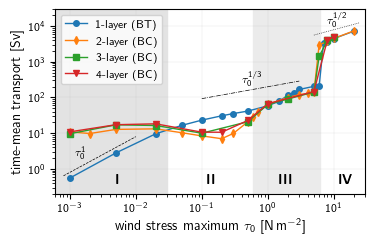

In [5]:
figure(figsize=(4, 2.4))

xf = [1e-4, 3e-2, 3e-2, 1e-4]
yf = [1e-1, 1e-1, 1e5, 1e5]
fill(xf, yf, color=(0.89, 0.89, 0.89))


xf = [6e-1, 6.2, 6.2, 6e-1]
yf = [1e-1, 1e-1, 1e5, 1e5]
fill(xf, yf, color=(0.92, 0.92, 0.92))


loglog(WS[1], sum(Transport[1], dims=1)', "o-", linewidth=1, markersize=4, label="1-layer (BT)")
loglog(WS[2], sum(Transport[2], dims=1)', "d-", linewidth=1, markersize=4, label="2-layer (BC)")
loglog(WS[3], sum(Transport[3], dims=1)', "s-", linewidth=1, markersize=4, label="3-layer (BC)")
loglog(WS[4], sum(Transport[4], dims=1)', "v-", linewidth=1, markersize=4, label="4-layer (BC)")
loglog([8e-4, 1e-2], 0.8e3*[8e-4, 1e-2], "k--", linewidth=0.5)
loglog([0.1, 3], 2e2*[0.1, 3].^(1/3), "k-.", linewidth=0.5)
loglog([5, 25], 2.5e3*[5, 25].^(1/2), "k:", linewidth=0.5)

annotate(L"$\tau_0^{1}$", xy=(2, 1), xytext=(1.2e-3, 2), fontsize=8)
annotate(L"$\tau_0^{1/3}$", xy=(2, 1), xytext=(0.4, 230), fontsize=8)
annotate(L"$\tau_0^{1/2}$", xy=(2, 1), xytext=(8, 1e4), fontsize=8)
annotate(L"\textbf{I}", xy=(2, 1), xytext=(5e-3, 0.4), fontsize=10)
annotate(L"\textbf{II}", xy=(2, 1), xytext=(1.2e-1, 0.4), fontsize=10)
annotate(L"\textbf{III}", xy=(2, 1), xytext=(1.5, 0.4), fontsize=10)
annotate(L"\textbf{IV}", xy=(2, 1), xytext=(12, 0.4), fontsize=10)
ylim(2e-1, 3e4)
xlim(6e-4, 3e1)
legend(fontsize=8)
grid(which="major", linewidth=0.1)
xlabel(L"wind stress maximum $\tau_0$ [N$\,$m$^{-2}$]")
ylabel("time-mean transport [Sv]");
savefig("transport.pdf", bbox_inches="tight")